In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df=pd.read_csv(r'../data/car_data.csv')
df.head()

,selling_price,km_driven,car_age
0,450000,145500,7
1,700000,50000,3
2,550000,70000,8
3,500000,120000,7
4,360000,158000,9


In [3]:
df.isnull().sum()

selling_price    0
km_driven        0
car_age          0
dtype: int64

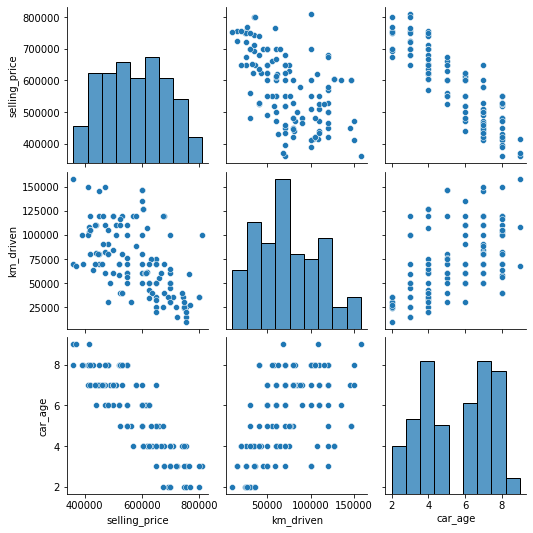

In [9]:
sns.pairplot(df)

In [4]:
df.corr()

,selling_price,km_driven,car_age
selling_price,1.000000,-0.549314,-0.872386
km_driven,-0.549314,1.000000,0.509514
car_age,-0.872386,0.509514,1.000000


<AxesSubplot:>

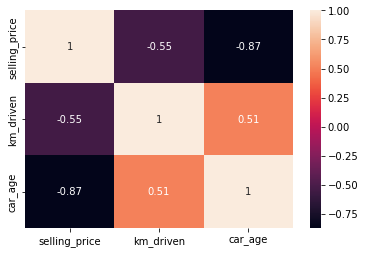

In [9]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True)

In [10]:
X=df.drop(['selling_price'],axis=1)
X

,km_driven,car_age
0,145500,7
1,50000,3
2,70000,8
3,120000,7
4,158000,9
...,...,...
124,35700,2
125,30000,4
126,68000,9
127,50000,6


In [11]:
y=df['selling_price']
y

0      450000
1      700000
2      550000
3      500000
4      360000
        ...  
124    800000
125    750000
126    370000
127    600000
128    625000
Name: selling_price, Length: 129, dtype: int64

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

In [13]:
from sklearn.linear_model import LinearRegression 
# create linear regression object
model = LinearRegression()
 
# train the model using the training sets
model.fit(X_train, y_train)

LinearRegression()

In [14]:
y_pred=model.predict(X_test)

In [16]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7911748490944143

In [17]:
import pickle
pickle.dump(model, open('../models/lin_reg_model_v1.pkl','wb'))